In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
path_Pce = "J:/Dropbox/DataScience/TimeSeries/AV/"
path_Yoga = "C:/Users/richa/DropBox_iovi/Dropbox/DataScience/TimeSeries/AV/"

path = path_Yoga

train = pd.read_csv(path + "Train_SU63ISt.csv")
test = pd.read_csv(path + "Test_0qrQsBZ.csv")

In [3]:
train_orig = train.copy()
test_orig = test.copy()

In [4]:
print(train.columns)
print()
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')

Index(['ID', 'Datetime'], dtype='object')


Let's look at the datatype of each feature

In [5]:
print(train.dtypes)
print()
print(test.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object

ID           int64
Datetime    object
dtype: object


In [6]:
print(train.shape)
print()
print(test.shape)

(18288, 3)

(5112, 2)


# Feature extraction

change the Datetime column to datetime type

In [7]:
train["Datetime"] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test["Datetime"] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_orig["Datetime"] = pd.to_datetime(train_orig.Datetime, format='%d-%m-%Y %H:%M')
test_orig["Datetime"] = pd.to_datetime(test_orig.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
print(train.dtypes)
print()
print(test.dtypes)

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

ID                   int64
Datetime    datetime64[ns]
dtype: object


In [9]:
for i in (train, test, train_orig, test_orig):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["hour"] = i.Datetime.dt.hour

make weekend variable

In [10]:
train["dayofweek"] = train["Datetime"].dt.dayofweek
temp = train["Datetime"]

values 5 and 6 are weekend days; 
assign 1 if the day is weekend else 0

In [11]:
def applyer(row):
    if row.dayofweek==6 or row.dayofweek==5:
        return 1
    else:
        return 0

temp2 = train["Datetime"].apply(applyer)
train["weekend"] = temp2

In [12]:
print(train.head(30))

    ID            Datetime  Count  year  month  day  hour  dayofweek  weekend
0    0 2012-08-25 00:00:00      8  2012      8   25     0          5        1
1    1 2012-08-25 01:00:00      2  2012      8   25     1          5        1
2    2 2012-08-25 02:00:00      6  2012      8   25     2          5        1
3    3 2012-08-25 03:00:00      2  2012      8   25     3          5        1
4    4 2012-08-25 04:00:00      2  2012      8   25     4          5        1
5    5 2012-08-25 05:00:00      2  2012      8   25     5          5        1
6    6 2012-08-25 06:00:00      2  2012      8   25     6          5        1
7    7 2012-08-25 07:00:00      2  2012      8   25     7          5        1
8    8 2012-08-25 08:00:00      6  2012      8   25     8          5        1
9    9 2012-08-25 09:00:00      2  2012      8   25     9          5        1
10  10 2012-08-25 10:00:00      2  2012      8   25    10          5        1
11  11 2012-08-25 11:00:00      6  2012      8   25    11       

change the index and plot the graph

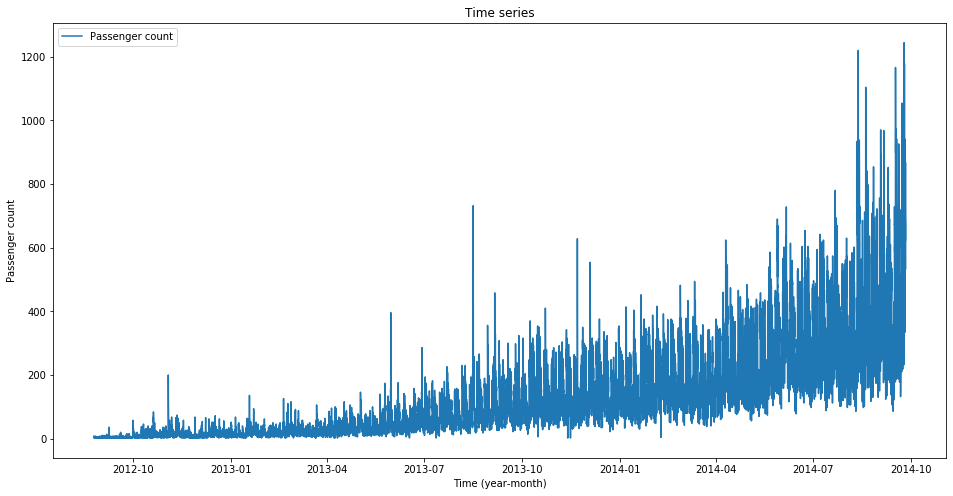

In [13]:
train.index = train["Datetime"]
df = train.drop("ID", 1)
ts = df.Count
plt.figure(figsize=(16,8))
plt.plot(ts, label="Passenger count")
plt.title("Time series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# Exploratory Analysis

Hypotéza: počet pasažérů meziročně roste

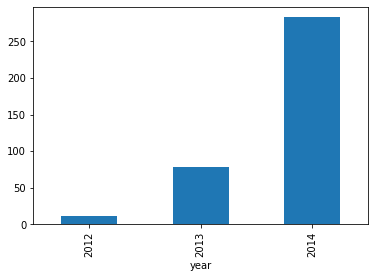

In [14]:
train.groupby("year")["Count"].mean().plot.bar()

Hypotéza: počet pasažérů je nižší v období říjen - březen

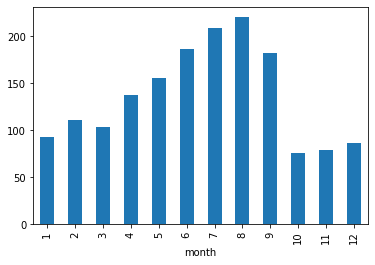

In [15]:
train.groupby("month")["Count"].mean().plot.bar()

investigate monthly mean each year separately

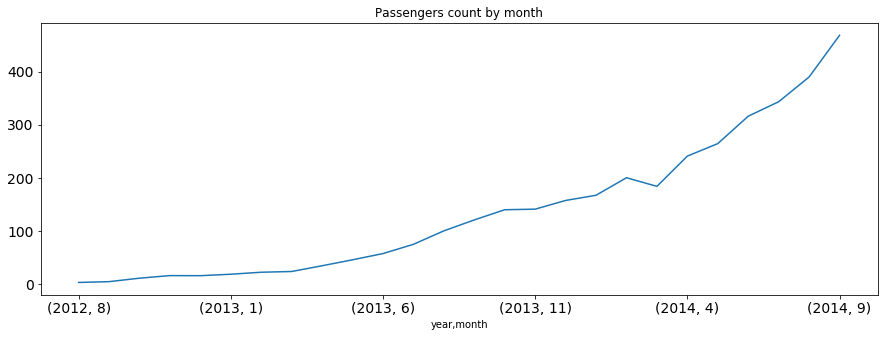

In [16]:
temp = train.groupby(["year", "month"])["Count"].mean()
temp.plot(figsize=(15,5), title="Passengers count by month", fontsize=14)

Data pro 9 - 12 / 2014 chybí, naopak jsou data pro 8 - 12 / 2012 -> významně zkresluje předchozí graf!!!

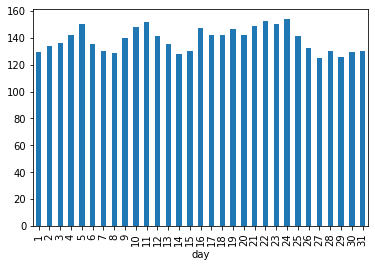

In [17]:
train.groupby("day")["Count"].mean().plot.bar()

investigate daily hours mean

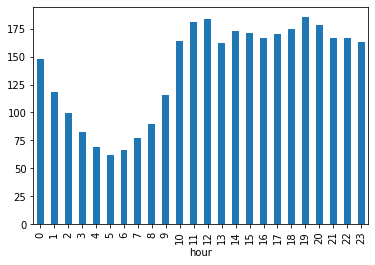

In [18]:
train.groupby("hour")["Count"].mean().plot.bar()

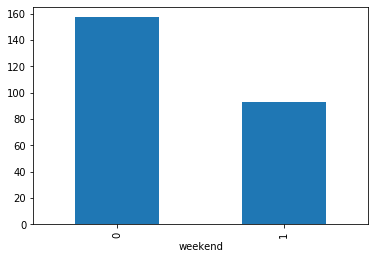

In [19]:
train.groupby("weekend")["Count"].mean().plot.bar()

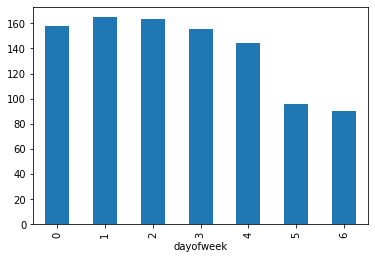

In [20]:
train.groupby("dayofweek")["Count"].mean().plot.bar()

In [21]:
train = train.drop("ID", 1)

reduce the noise of hourly time series

In [22]:
train.Timestamp = pd.to_datetime(train["Datetime"], format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

hourly time series mean

In [23]:
hourly = train.resample("H").mean()

daily time series mean

In [24]:
daily = train.resample("D").mean()

weekly time series mean

In [25]:
weekly = train.resample("W").mean()

monthly time series mean

In [26]:
monthly = train.resample("M").mean()

plot the new time series

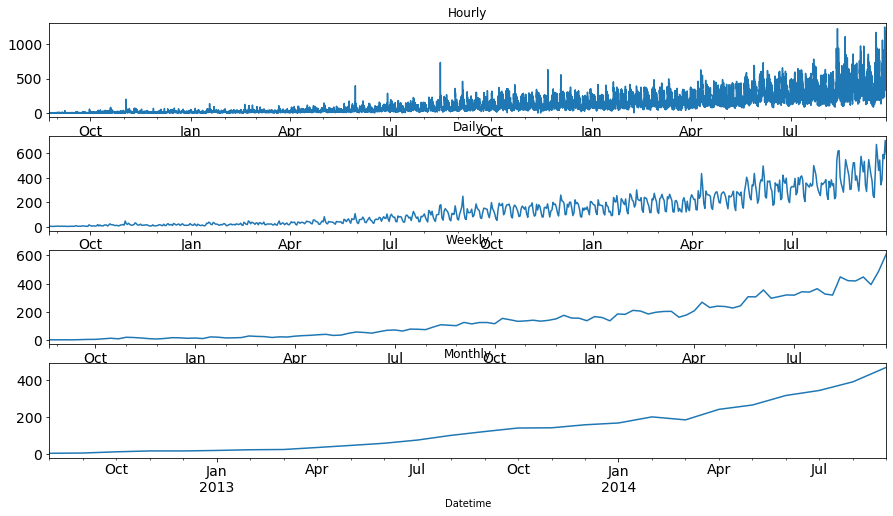

In [27]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title="Hourly", fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title="Daily", fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title="Weekly", fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title="Monthly", fontsize=14, ax=axs[3])
plt.show()

prepare the test datase

In [28]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

converting to daily mean

In [29]:
print(test.head())

                        ID            Datetime  year  month  day  hour
Datetime                                                              
2014-09-26 00:00:00  18288 2014-09-26 00:00:00  2014      9   26     0
2014-09-26 01:00:00  18289 2014-09-26 01:00:00  2014      9   26     1
2014-09-26 02:00:00  18290 2014-09-26 02:00:00  2014      9   26     2
2014-09-26 03:00:00  18291 2014-09-26 03:00:00  2014      9   26     3
2014-09-26 04:00:00  18292 2014-09-26 04:00:00  2014      9   26     4


In [30]:
test = test.resample("D").mean()
print(test.head())

                 ID    year  month   day  hour
Datetime                                      
2014-09-26  18299.5  2014.0    9.0  26.0  11.5
2014-09-27  18323.5  2014.0    9.0  27.0  11.5
2014-09-28  18347.5  2014.0    9.0  28.0  11.5
2014-09-29  18371.5  2014.0    9.0  29.0  11.5
2014-09-30  18395.5  2014.0    9.0  30.0  11.5


In [31]:
train = train.resample("D").mean()
print(train.head())

               Count    year  month   day  hour  dayofweek  weekend
Datetime                                                           
2012-08-25  3.166667  2012.0    8.0  25.0  11.5        5.0      1.0
2012-08-26  3.666667  2012.0    8.0  26.0  11.5        6.0      1.0
2012-08-27  2.583333  2012.0    8.0  27.0  11.5        0.0      0.0
2012-08-28  2.416667  2012.0    8.0  28.0  11.5        1.0      0.0
2012-08-29  2.500000  2012.0    8.0  29.0  11.5        2.0      0.0


# Splitting the data into training and validation part

In [32]:
Train = train.loc["2012-08-25":"2014-06-24"]
valid = train.loc["2014-06-25":"2014-09-25"]

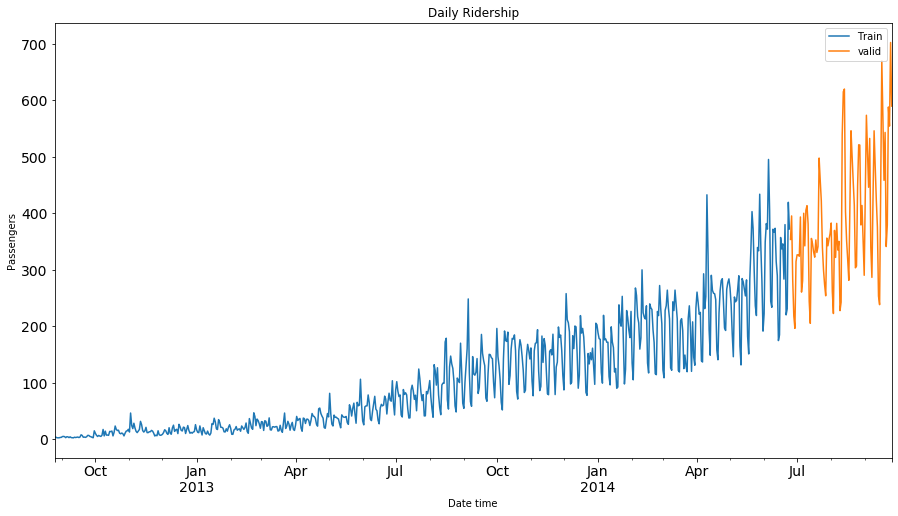

In [33]:
Train.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="Train")
valid.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="valid")
plt.xlabel("Date time")
plt.ylabel("Passengers")
plt.legend(loc="best")
plt.show()

# Naive approach

In [34]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat["naive"] = dd[len(dd)-1]
print(y_hat.tail())

                 Count    year  month   day  hour  dayofweek  weekend  \
Datetime                                                                
2014-09-21  379.250000  2014.0    9.0  21.0  11.5        6.0      1.0   
2014-09-22  588.166667  2014.0    9.0  22.0  11.5        0.0      0.0   
2014-09-23  554.333333  2014.0    9.0  23.0  11.5        1.0      0.0   
2014-09-24  702.333333  2014.0    9.0  24.0  11.5        2.0      0.0   
2014-09-25  589.666667  2014.0    9.0  25.0  11.5        3.0      0.0   

                 naive  
Datetime                
2014-09-21  372.166667  
2014-09-22  372.166667  
2014-09-23  372.166667  
2014-09-24  372.166667  
2014-09-25  372.166667  


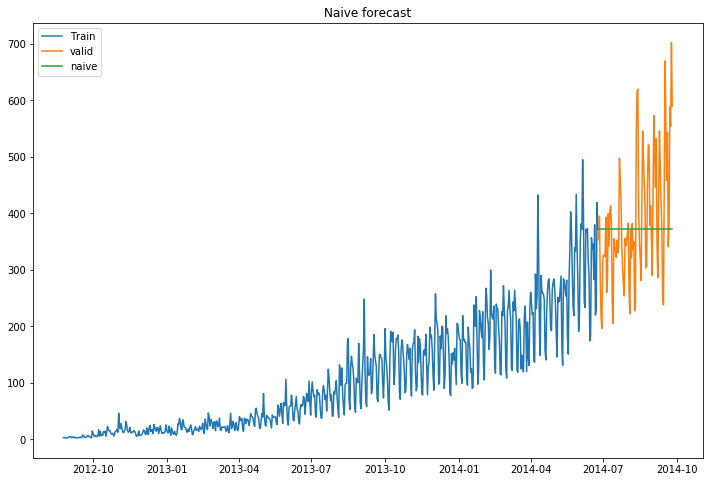

In [35]:
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train["Count"], label="Train")
plt.plot(valid.index, valid["Count"], label="valid")
plt.plot(y_hat.index, y_hat["naive"], label="naive")
plt.legend(loc="best")
plt.title("Naive forecast")
plt.show()

calculate RMSE

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


# Moving Average

In [37]:
y_hat_avg = valid.copy()
y_hat_avg["moving_avg_forecat"] = Train["Count"].rolling(10).mean().iloc[-1]


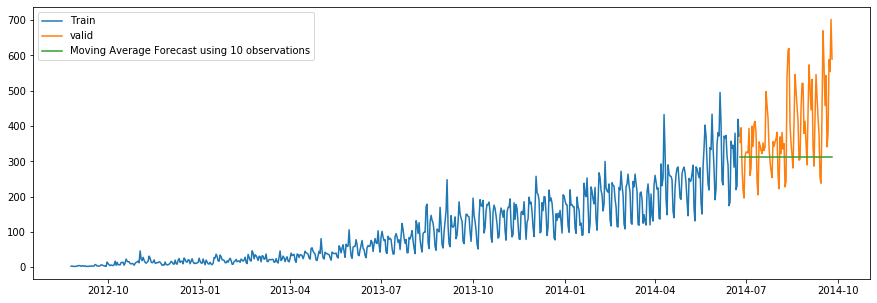

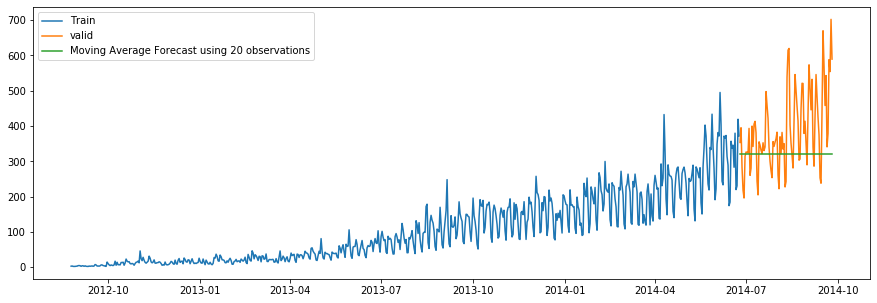

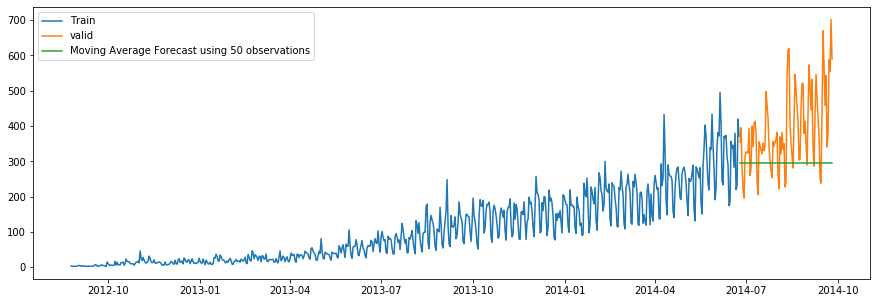

In [38]:
plt.figure(figsize=(15,5))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["moving_avg_forecat"], label="Moving Average Forecast using 10 observations")
plt.legend(loc="best")
plt.show()

y_hat_avg = valid.copy()
y_hat_avg["moving_avg_forecat"] = Train["Count"].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["moving_avg_forecat"], label="Moving Average Forecast using 20 observations")
plt.legend(loc="best")
plt.show()

y_hat_avg = valid.copy()
y_hat_avg["moving_avg_forecat"] = Train["Count"].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["moving_avg_forecat"], label="Moving Average Forecast using 50 observations")
plt.legend(loc="best")
plt.show()

In [39]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg["moving_avg_forecat"]))
print(rms)

144.19175679986802


# Simple Exponential Smoothing

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [41]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg["SES"] = fit2.forecast(len(valid))

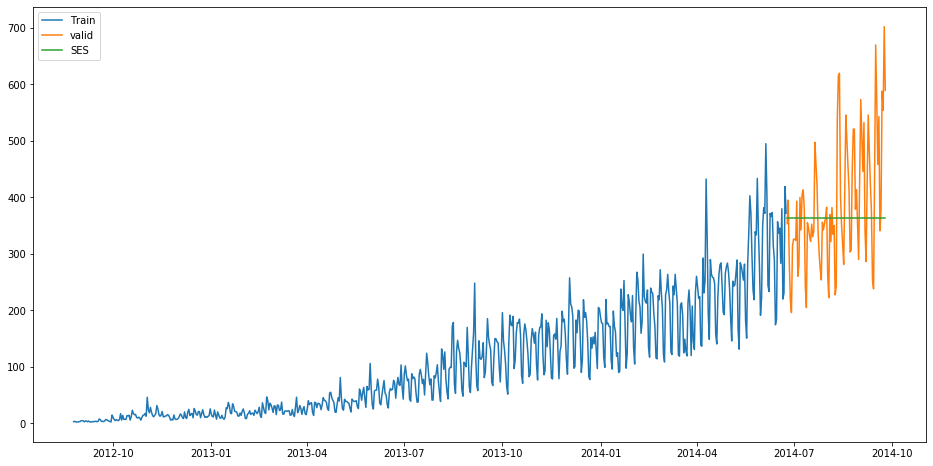

In [42]:
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["SES"], label="SES")
plt.legend(loc="best")
plt.show()

In [43]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg["SES"]))
print(rms)

113.43708111884514


# Holt's Trend Linear Model

In [44]:
import statsmodels.api as sm

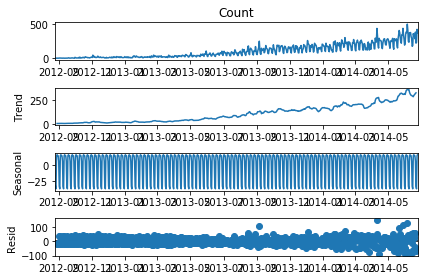

In [45]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [46]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train["Count"])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg["Holt_linear"] = fit1.forecast(len(valid))


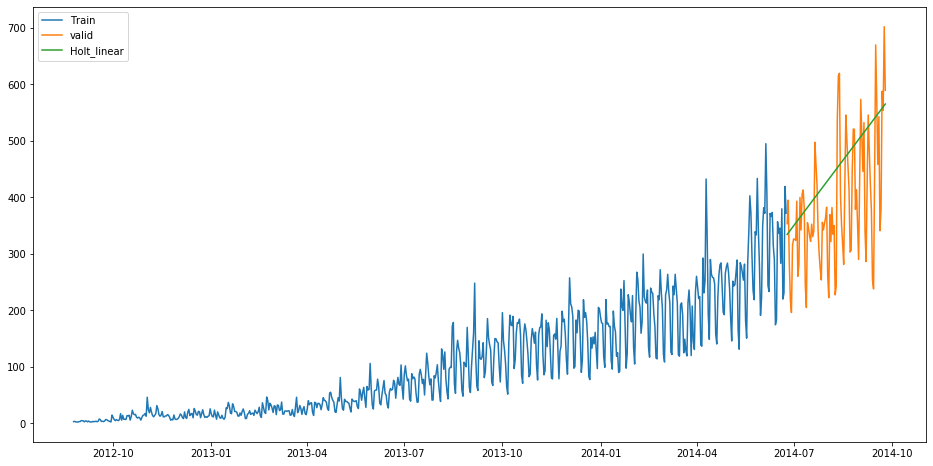

In [47]:
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["Holt_linear"], label="Holt_linear")
plt.legend(loc="best")
plt.show()

In [48]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg["Holt_linear"]))
print(rms)

112.94278345314041


# Holt's Linear trend model on daily time series

In [50]:
submission = pd.read_csv(path + "sample_submission_LSeus50.csv")

make prediction for test dataset

In [51]:
predict = fit1.forecast(len(test))
test["prediction"] = predict
print(test.head())

                 ID    year  month   day  hour  prediction
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  334.650767
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  337.159011
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  339.667256
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  342.175500
2014-09-30  18395.5  2014.0    9.0  30.0  11.5  344.683745


convert daily prediction to hourly basis

calculating the hourly ratio of count

In [52]:
train_orig["ratio"] = train_orig["Count"] / train_orig["Count"].sum()

grouping the hourly ratio

In [53]:
temp = train_orig.groupby('hour')["ratio"].sum()
print(temp.head())

hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64


Groupby to csv format

In [54]:
pd.DataFrame(temp, columns = ["hour", "ratio"]).to_csv("GROUPby.csv")

In [56]:
temp2 = pd.read_csv(path + "GROUPby.csv")
temp2 = temp2.drop("hour.1", 1)
print(temp2.head())

   hour     ratio
0     0  0.044287
1     1  0.035343
2     2  0.029911
3     3  0.024714
4     4  0.020802


merge test and test_orig on day, month and year

In [57]:
merge = pd.merge(test, test_orig, on = ("day", "month", "year"), how="left")
print(merge.head())
merge["hour"] = merge["hour_y"]
merge = merge.drop(["year", "month", "Datetime", "hour_x", "hour_y"], axis=1)
print(merge.head())

      ID_x    year  month   day  hour_x  prediction   ID_y  \
0  18299.5  2014.0    9.0  26.0    11.5  334.650767  18288   
1  18299.5  2014.0    9.0  26.0    11.5  334.650767  18289   
2  18299.5  2014.0    9.0  26.0    11.5  334.650767  18290   
3  18299.5  2014.0    9.0  26.0    11.5  334.650767  18291   
4  18299.5  2014.0    9.0  26.0    11.5  334.650767  18292   

             Datetime  hour_y  
0 2014-09-26 00:00:00       0  
1 2014-09-26 01:00:00       1  
2 2014-09-26 02:00:00       2  
3 2014-09-26 03:00:00       3  
4 2014-09-26 04:00:00       4  
      ID_x   day  prediction   ID_y  hour
0  18299.5  26.0  334.650767  18288     0
1  18299.5  26.0  334.650767  18289     1
2  18299.5  26.0  334.650767  18290     2
3  18299.5  26.0  334.650767  18291     3
4  18299.5  26.0  334.650767  18292     4


predicting by merging merge and temp2

In [58]:
prediction = pd.merge(merge, temp2, on="hour", how="left")

convert the ratio to the original scale

In [59]:
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]

In [60]:
print(prediction.head())

      ID_x   day  prediction   ID_y  hour     ratio       Count     ID
0  18299.5  26.0  334.650767  18288     0  0.044287  355.692974  18288
1  18299.5  26.0  334.650767  18289     1  0.035343  283.861602  18289
2  18299.5  26.0  334.650767  18290     2  0.029911  240.234347  18290
3  18299.5  26.0  334.650767  18291     3  0.024714  198.497058  18291
4  18299.5  26.0  334.650767  18292     4  0.020802  167.075574  18292


drop all features except ID na Count

In [61]:
submission = prediction.drop(["ID_x", "day", "prediction", "ID_y", "hour", "ratio"], axis=1)

In [63]:
pd.DataFrame(submission, columns=["ID", "Count"]).to_csv(path + "Holt_linear.csv")

# Holt Winter's model on daily time series

In [64]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train["Count"]), seasonal_periods=7, trend="add", seasonal="add").fit()
y_hat_avg["Holt_Winter"] = fit1.forecast(len(valid))


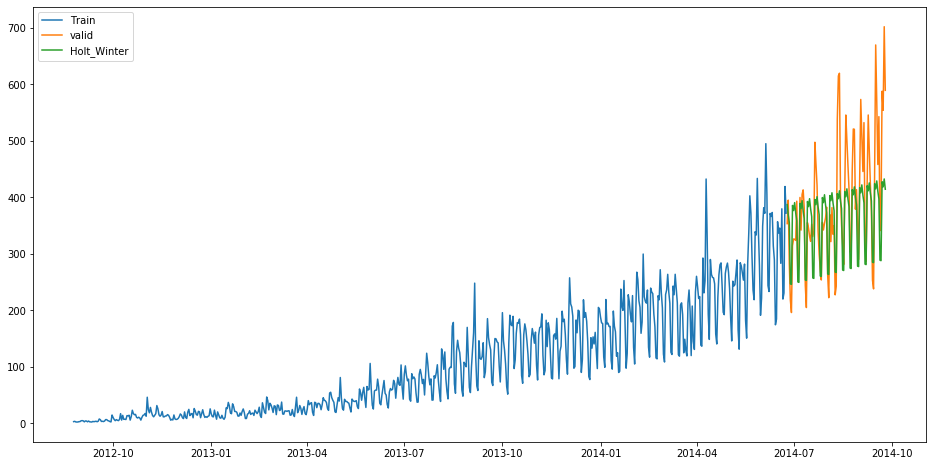

In [65]:
plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"], label="valid")
plt.plot(y_hat_avg["Holt_Winter"], label="Holt_Winter")
plt.legend(loc="best")
plt.show()

In [66]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.38041226792582


# Introduction to ARIMA model

# Parameter tuning for ARIMA model

Stationarity check

In [67]:
from statsmodels.tsa.stattools import adfuller

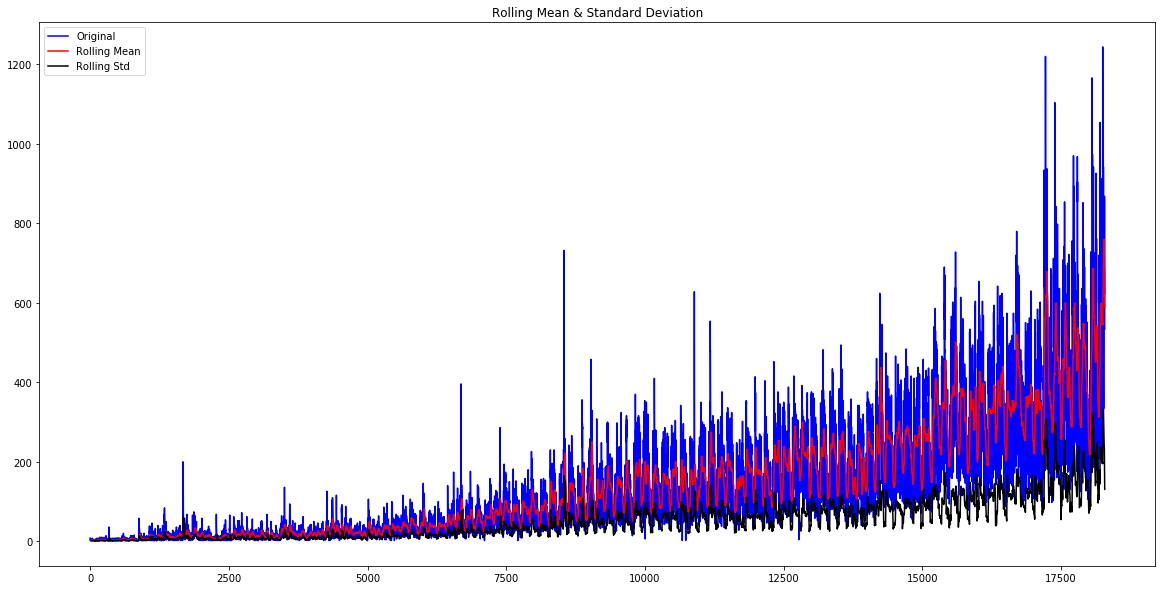

 Results of Dickey-Fuller test: 
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of observations Used    18242.000000
Critical (1%) value               -3.430709
Critical (5%) value               -2.861698
Critical (10%) value              -2.566854
dtype: float64


In [68]:
def test_stationarity(timeseries):
    # determining rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=24) #24 hours for each day
    #rolstd = pd.rolling_std(timeseries, window=24)
    rolmean = pd.Series(timeseries).rolling(window=24).mean() #24 hours for each day
    rolstd = pd.Series(timeseries).rolling(window=24).std() #24 hours for each day
    # plot rolling statistics
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()
    # perform Dickey-Fuller test
    print(" Results of Dickey-Fuller test: ")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of observations Used"])
    
    for key, value in dftest[4].items():
        dfoutput["Critical (%s) value" %key] = value
    print(dfoutput)
    
plt.rcParams["figure.figsize"] = 20,10
test_stationarity(train_orig["Count"])

making stationarity of time series

removing trend

In [69]:
Train_log = np.log(Train["Count"])
valid_log = np.log(valid["Count"])

In [70]:
moving_avg = pd.Series(Train_log).rolling(window=24).mean()

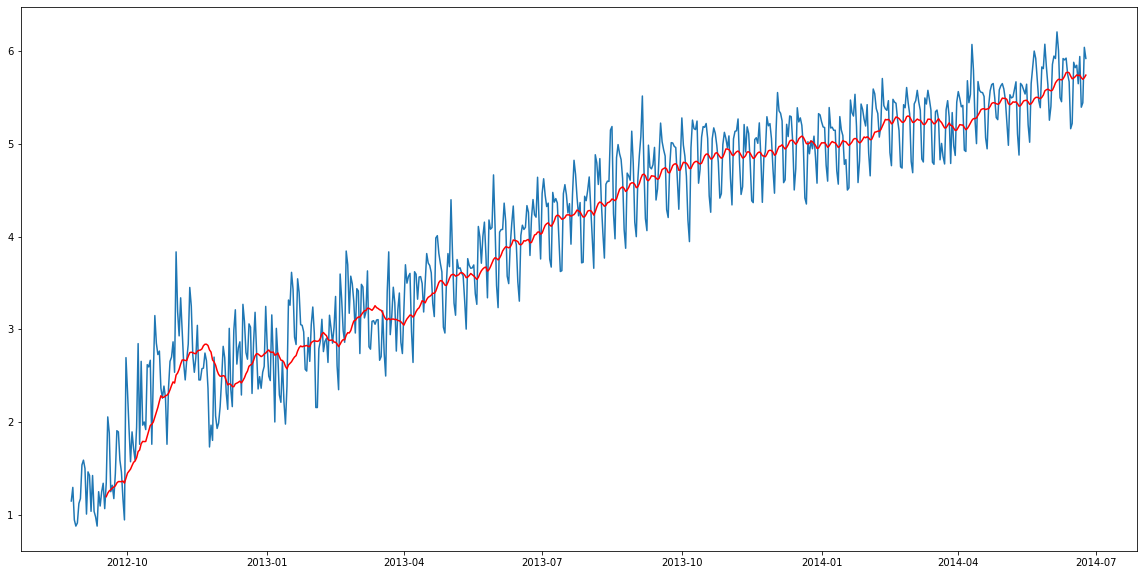

In [71]:
plt.plot(Train_log)
plt.plot(moving_avg, color="red")
plt.show()

remove the increasing trend

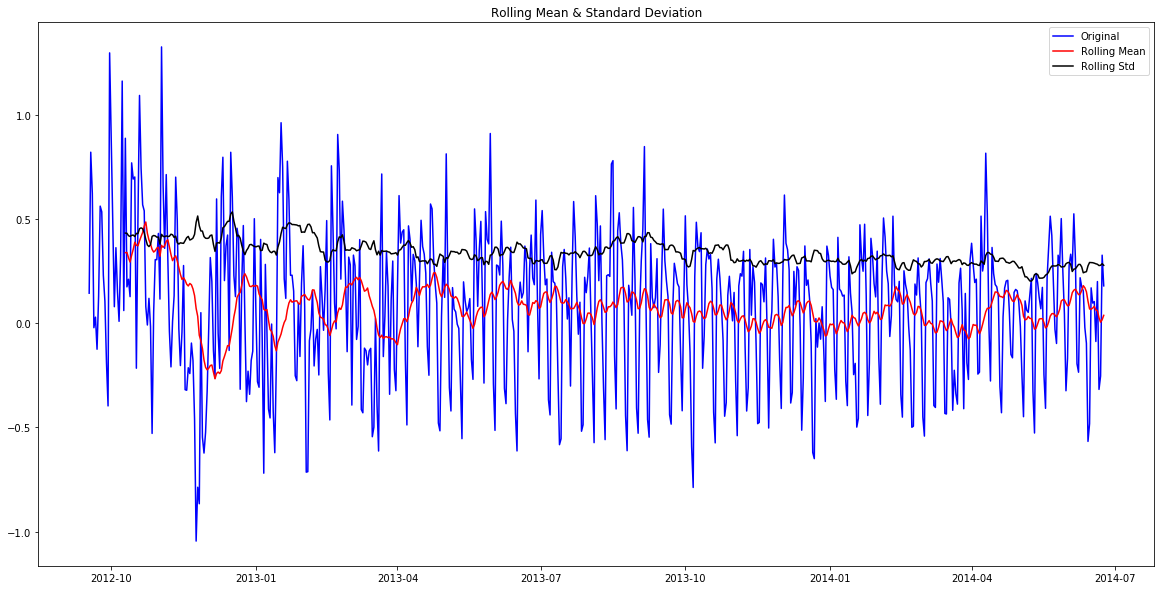

 Results of Dickey-Fuller test: 
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of observations Used    6.250000e+02
Critical (1%) value           -3.440856e+00
Critical (5%) value           -2.866175e+00
Critical (10%) value          -2.569239e+00
dtype: float64


In [72]:
train_log_moving_avg_dif = Train_log - moving_avg
train_log_moving_avg_dif.dropna(inplace=True)
test_stationarity(train_log_moving_avg_dif)

Test Statistic < p-value => the trend is removed

stabilize the men of time series by diferentiating

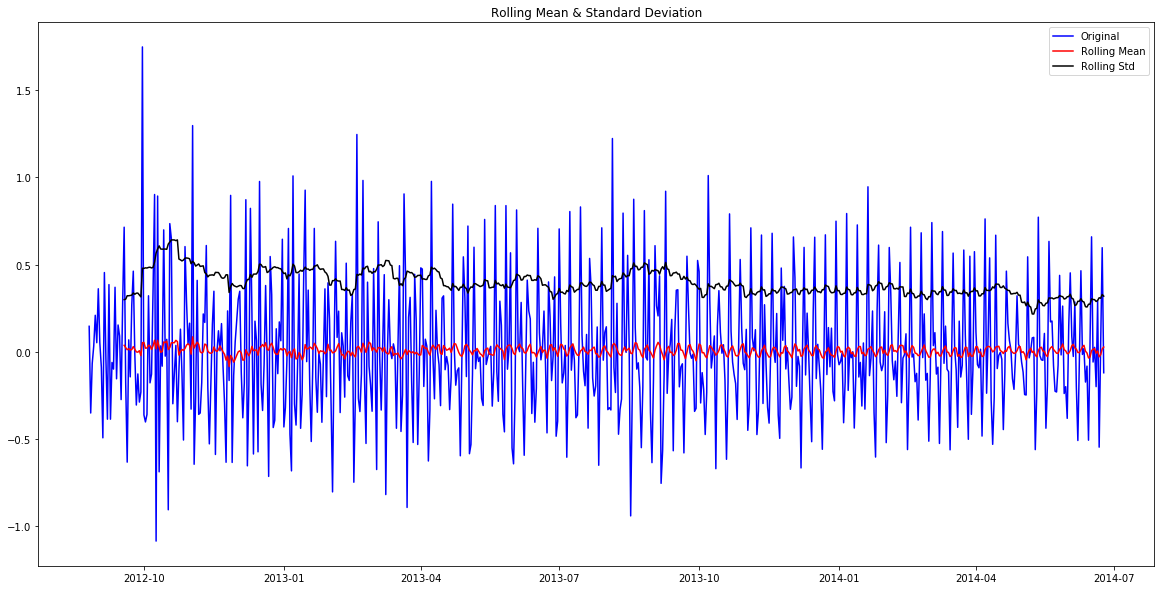

 Results of Dickey-Fuller test: 
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of observations Used    6.480000e+02
Critical (1%) value           -3.440482e+00
Critical (5%) value           -2.866011e+00
Critical (10%) value          -2.569151e+00
dtype: float64


In [73]:
train_log_dif = Train_log - Train_log.shift(1)
test_stationarity(train_log_dif.dropna())

# Removing Seasonality

decompose the time series into trend and seasonality and get the residual

In [74]:
decomposition = sm.tsa.seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

In [75]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

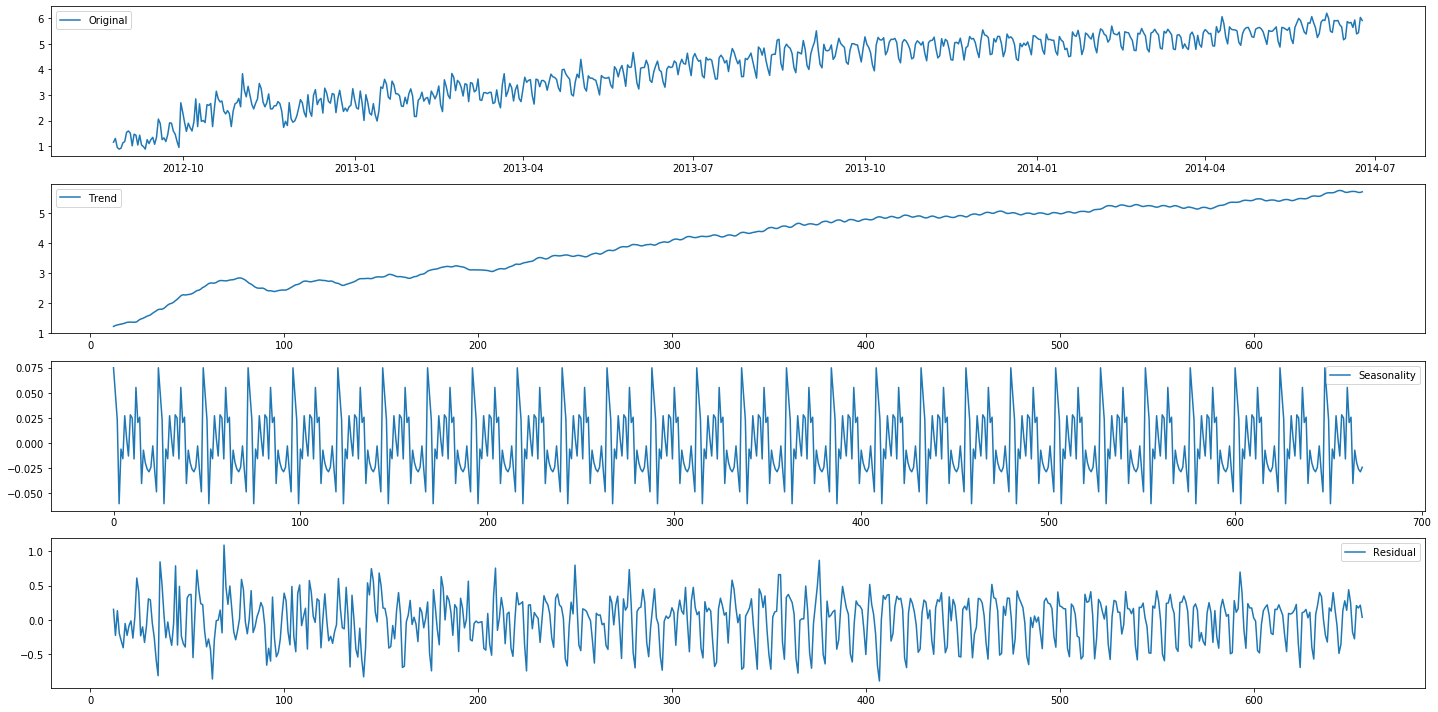

In [76]:
plt.subplot(411)
plt.plot(Train_log, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

check stationarity of residuals

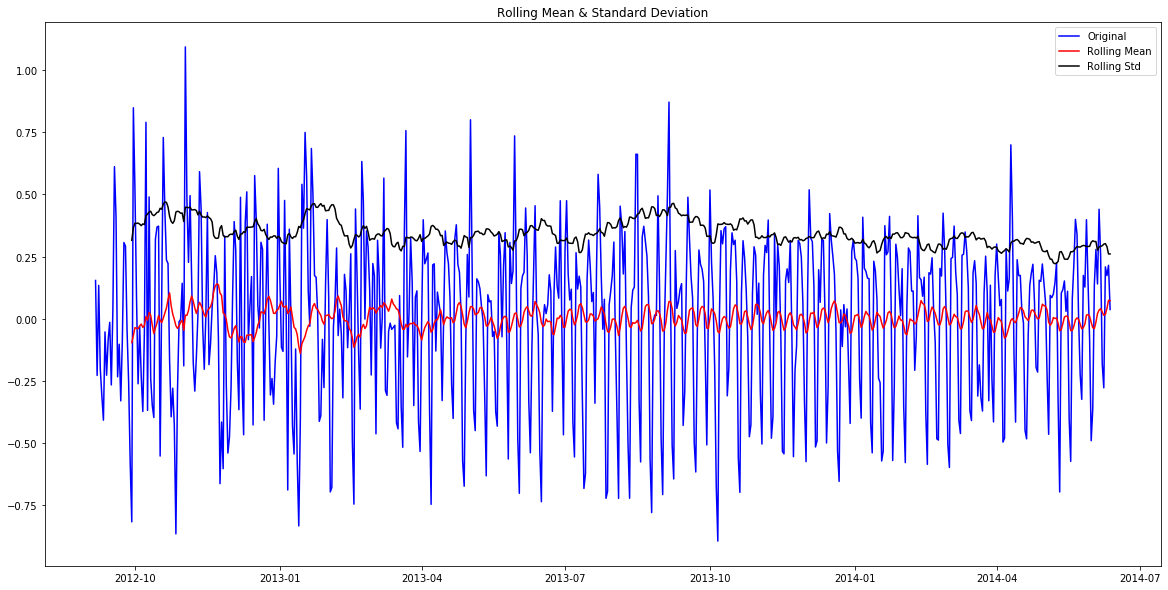

 Results of Dickey-Fuller test: 
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of observations Used    6.240000e+02
Critical (1%) value           -3.440873e+00
Critical (5%) value           -2.866183e+00
Critical (10%) value          -2.569243e+00
dtype: float64


In [77]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose["date"] = Train_log.index
train_log_decompose.set_index("date", inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

residuals are stationary

# Forecasting the Time Series using ARIMA

In [80]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_dif.dropna(), nlags=25)
lag_pacf = pacf(train_log_dif.dropna(), nlags=25, method="ols")

In [ ]:
plt.plot(lag_acf)
